In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")
df.head(7)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No


In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.shape

(7043, 21)

In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['tenure'] = df['tenure'].astype(str)

In [9]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [10]:
df['MonthlyCharges'] = df['MonthlyCharges'].astype(str)

In [11]:
df['TotalCharges'] = df['TotalCharges'].astype(str)

In [12]:
df.dtypes

customerID          object
gender              object
SeniorCitizen       object
Partner             object
Dependents          object
tenure              object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
MonthlyCharges      object
TotalCharges        object
Churn               object
dtype: object

In [13]:
import seaborn as sns

In [14]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df["gender"]=LE.fit_transform(df["gender"])
df["gender"].value_counts()

1    3555
0    3488
Name: gender, dtype: int64

In [15]:
df_categorical=df[[ 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod','Churn']].copy()

In [16]:
LE.inverse_transform([1,0])

array(['Male', 'Female'], dtype=object)

1    3555
0    3488
Name: gender, dtype: int64


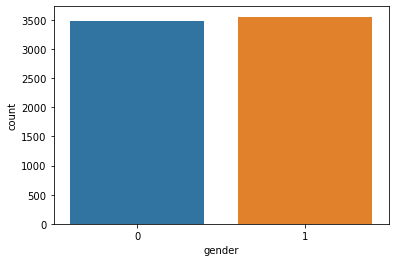

In [17]:
ax=sns.countplot(x='gender',data=df_categorical)
print(df_categorical["gender"].value_counts())

In [18]:
df["partner"]=LE.fit_transform(df["gender"])
df["partner"].value_counts()

1    3555
0    3488
Name: partner, dtype: int64

No     3641
Yes    3402
Name: Partner, dtype: int64


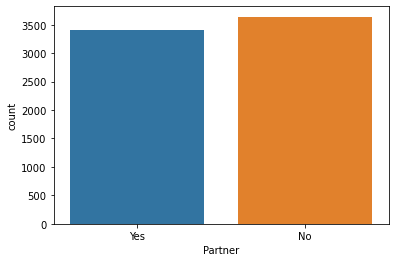

In [19]:
ax=sns.countplot(x='Partner',data=df_categorical)
print(df_categorical["Partner"].value_counts())

No     4933
Yes    2110
Name: Dependents, dtype: int64


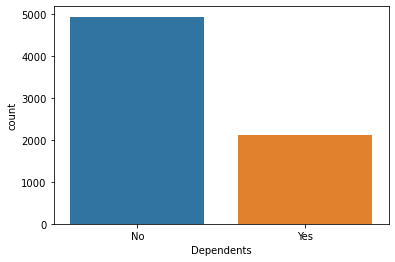

In [20]:
ax=sns.countplot(x='Dependents',data=df_categorical)
print(df_categorical["Dependents"].value_counts())

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


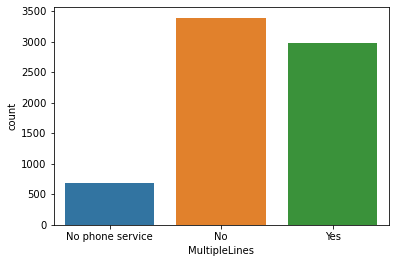

In [21]:
ax=sns.countplot(x='MultipleLines',data=df_categorical)
print(df_categorical["MultipleLines"].value_counts())

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


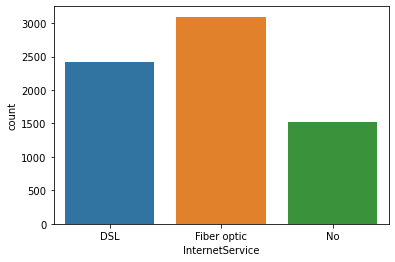

In [22]:
ax=sns.countplot(x='InternetService',data=df_categorical)
print(df_categorical["InternetService"].value_counts())

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


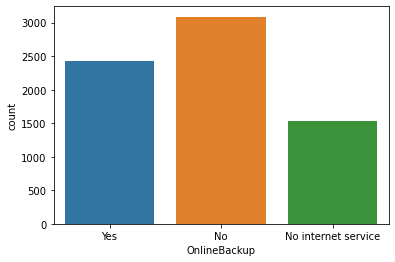

In [23]:
ax=sns.countplot(x='OnlineBackup',data=df_categorical)
print(df_categorical["OnlineBackup"].value_counts())

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


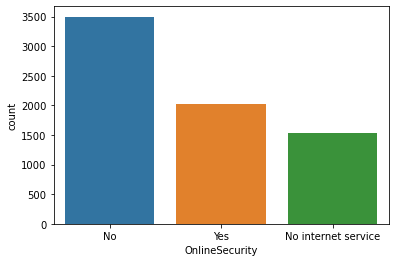

In [24]:
ax=sns.countplot(x='OnlineSecurity',data=df_categorical)
print(df_categorical["OnlineSecurity"].value_counts())

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


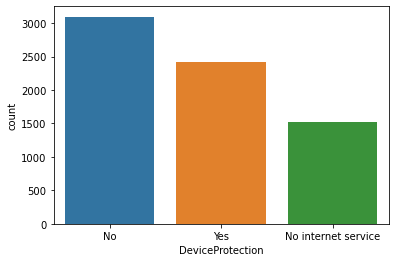

In [25]:
ax=sns.countplot(x='DeviceProtection',data=df_categorical)
print(df_categorical["DeviceProtection"].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


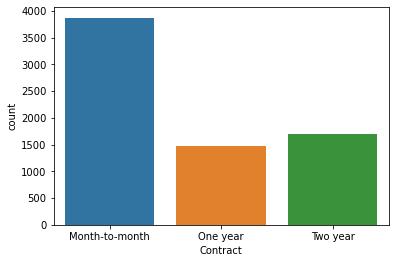

In [26]:
ax=sns.countplot(x='Contract',data=df_categorical)
print(df_categorical["Contract"].value_counts())

In [27]:
df_continous=df[["customerID","tenure","MonthlyCharges","TotalCharges"]].copy()

In [28]:
df_continous.columns

Index(['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

C:\Users\Preston\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

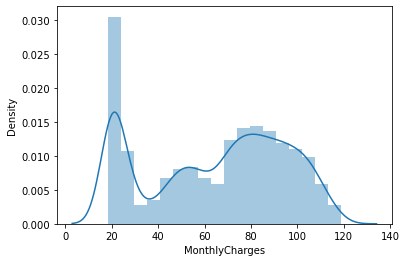

In [29]:
sns.distplot(df_continous["MonthlyCharges"],kde=True)

C:\Users\Preston\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tenure', ylabel='Density'>

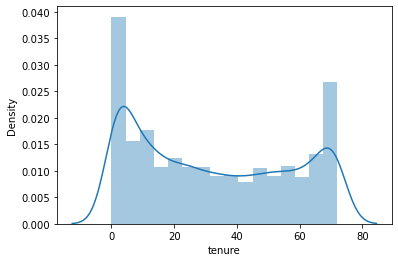

In [30]:
sns.distplot(df_continous["tenure"],kde=True)

In [31]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [ ]:
for i in df.columns:
    ifdf[i].dtypes=="object":
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [34]:
df.skew().sort_values()

MonthlyCharges   -0.220524
gender           -0.019031
partner          -0.019031
tenure            0.239540
SeniorCitizen     1.833633
dtype: float64

In [35]:
features=df.drop('Churn',axis=1)
target=df['Churn']

In [36]:
from sklearn.preprocessing import MinMaxScaler
mmx=MinMaxScaler()
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [37]:
for i in range(0,100):
    features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2,random_state=i)
    lr.fit(features_train,target_train)
    pred_train=lr.predict(features_train)
    pred_test=lr.predict(features_test)
    print(f"At random state(i),The Training Accucary is:-  {r2_score(target_train,pred_train)}")
    print(f"At random state(i),The Training Accucary is:-  {r2_score(target_test,pred_test)}")
    print("\n")

ValueError: could not convert string to float: '9453-PATOS'